In [49]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('data_sub.csv')

In [6]:
df.head()

,Unnamed: 0,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks
0,39,2016-11-01,company00053,job0000055,US,MO,California,0.0,NaN,NaN,...,NaN,30200,NaN,EN,0.0,0.0,High School,99,10,2
1,287,2016-11-02,company00330,job0000349,US,NY,Tonawanda,0.0,NaN,NaN,...,NaN,57900,NaN,EN,0.0,0.0,None,98,28,0
2,288,2016-11-03,company00330,job0000349,US,NY,Tonawanda,0.0,NaN,NaN,...,NaN,57900,NaN,EN,0.0,0.0,None,99,18,2
3,354,2016-11-01,company00377,job0000398,US,IL,Elgin,0.0,NaN,NaN,...,4.0,53700,NaN,EN,0.0,1.0,Higher Education,96,8,8
4,355,2016-11-02,company00377,job0000398,US,IL,Elgin,0.0,NaN,NaN,...,4.0,53700,NaN,EN,0.0,1.0,Higher Education,97,14,0


We will scrape unemployment data for each state next, and create a new dataframe. 

In [2]:
req = requests.get("https://www.bls.gov/lau/lastrk17.htm")
soup = BeautifulSoup(req.text, "html.parser")

In [3]:
col_table = soup.find("table", {"class": "regular"})

In [21]:
columns = []
rows = []
count = 0
for tr in col_table.find_all("thead"):
    columns.append(tr.text.split("\n"))
for tr in col_table.find_all("tr"):
    if count >= 2:
        rows.append(tr.text.split("\n"))
    count += 1

In [22]:
columns = columns[0][2:-2]

In [23]:
columns

['State', '2017rate', 'Rank']

In [25]:
rows = rows[1:-1]

In [26]:
rows

[['Hawaii', '2.4', '1'],
 ['North Dakota', '2.6', '2'],
 ['New Hampshire', '2.7', '3'],
 ['Colorado', '2.8', '4'],
 ['Nebraska', '2.9', '5'],
 ['Vermont', '3.0', '6'],
 ['Iowa', '3.1', '7'],
 ['Idaho', '3.2', '8'],
 ['Utah', '3.2', '8'],
 ['Maine', '3.3', '10'],
 ['South Dakota', '3.3', '10'],
 ['Wisconsin', '3.3', '10'],
 ['Indiana', '3.5', '13'],
 ['Minnesota', '3.5', '13'],
 ['Kansas', '3.6', '15'],
 ['Arkansas', '3.7', '16'],
 ['Massachusetts', '3.7', '16'],
 ['Tennessee', '3.7', '16'],
 ['Missouri', '3.8', '19'],
 ['Virginia', '3.8', '19'],
 ['Montana', '4.0', '21'],
 ['Maryland', '4.1', '22'],
 ['Oregon', '4.1', '22'],
 ['Florida', '4.2', '24'],
 ['Wyoming', '4.2', '24'],
 ['Oklahoma', '4.3', '26'],
 ['South Carolina', '4.3', '26'],
 ['Texas', '4.3', '26'],
 ['Alabama', '4.4', '29'],
 ['Rhode Island', '4.5', '30'],
 ['Delaware', '4.6', '31'],
 ['Michigan', '4.6', '31'],
 ['New Jersey', '4.6', '31'],
 ['North Carolina', '4.6', '31'],
 ['Connecticut', '4.7', '35'],
 ['Georgia', '4.

In [27]:
unemployment_by_state = pd.DataFrame(data = rows, columns = columns)

In [28]:
unemployment_by_state

,State,2017rate,Rank
0,Hawaii,2.4,1
1,North Dakota,2.6,2
2,New Hampshire,2.7,3
3,Colorado,2.8,4
4,Nebraska,2.9,5
5,Vermont,3.0,6
6,Iowa,3.1,7
7,Idaho,3.2,8
8,Utah,3.2,8
9,Maine,3.3,10


In [30]:
unemployment_by_state.to_csv("unemployment_by_states.csv")

In [50]:
df.columns

Index(['Unnamed: 0', 'date', 'companyId', 'jobId', 'country', 'stateProvince',
       'city', 'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'jobAgeDays', 'clicks', 'localClicks'],
      dtype='object')

In [53]:
df['industry'].isnull().values.sum()

120088

A bit of exploratory data analysis through visualization will maybe help give us our next direction.

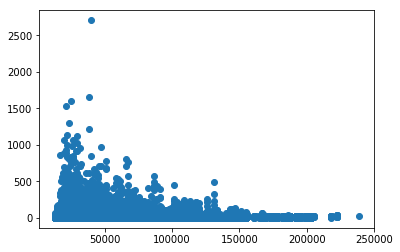

In [59]:
plt.scatter(x=df.estimatedSalary, y=df.clicks)
plt.show()

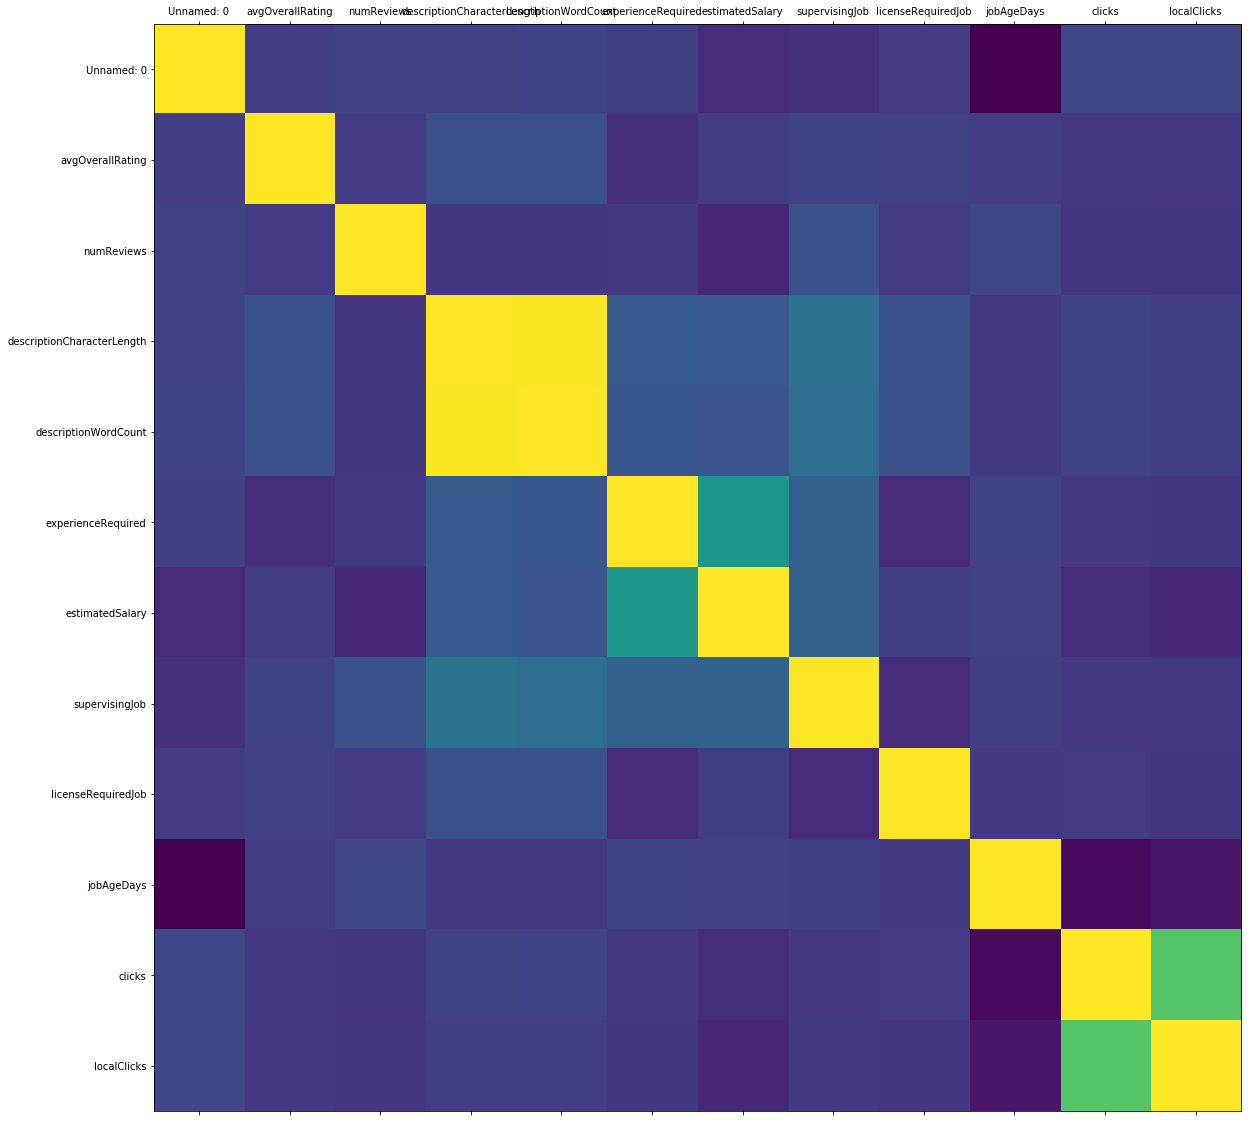

In [74]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

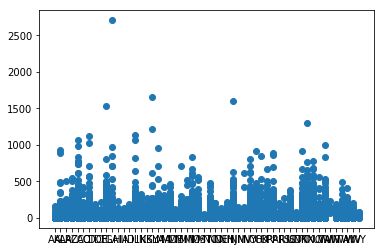

In [76]:
plt.scatter(x=df.stateProvince, y=df.clicks)
plt.show()

In [80]:
len(df["normTitleCategory"].unique())

58